In [27]:
# Data handling
import pandas as pd
import numpy as np

# Text cleaning
import re

# Sentiment analysis
from textblob import TextBlob

# Twitter scraping
import snscrape.modules.twitter as sntwitter  # 👈 insert this line here

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [11]:
import pandas as pd

# Use the full file path
df = pd.read_csv(r"C:\Users\91944\Desktop\sentimental-analysis-prediction\100_tweets_sample.csv")

# Display the first few rows
print(df.head())


                                    Tweet Sentiment
0          AI is transforming the future!  positive
1  Can't believe how fast AI is evolving.  positive
2      Not a fan of the latest AI trends.  negative
3    AI ethics should be taken seriously.   neutral
4            Machine learning is so cool!  positive


In [13]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your tweet dataset
df = pd.read_csv(r"C:\Users\91944\Desktop\sentimental-analysis-prediction\100_tweets_sample.csv")

# Function to clean tweets
def clean_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r"http\S+", "", text)          # Remove URLs
    text = re.sub(r"@\w+", "", text)             # Remove mentions
    text = re.sub(r"#\w+", "", text)             # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)      # Remove punctuations & numbers
    return text.strip()

# Apply cleaning
df["Cleaned_Tweet"] = df["Tweet"].apply(clean_text)

# Show the cleaned data
print(df[["Tweet", "Cleaned_Tweet", "Sentiment"]].head())

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Cleaned_Tweet"])


                                    Tweet  \
0          AI is transforming the future!   
1  Can't believe how fast AI is evolving.   
2      Not a fan of the latest AI trends.   
3    AI ethics should be taken seriously.   
4            Machine learning is so cool!   

                          Cleaned_Tweet Sentiment  
0         ai is transforming the future  positive  
1  cant believe how fast ai is evolving  positive  
2     not a fan of the latest ai trends  negative  
3   ai ethics should be taken seriously   neutral  
4           machine learning is so cool  positive  


In [6]:
print(df.columns)


Index(['Tweet', 'Sentiment'], dtype='object')


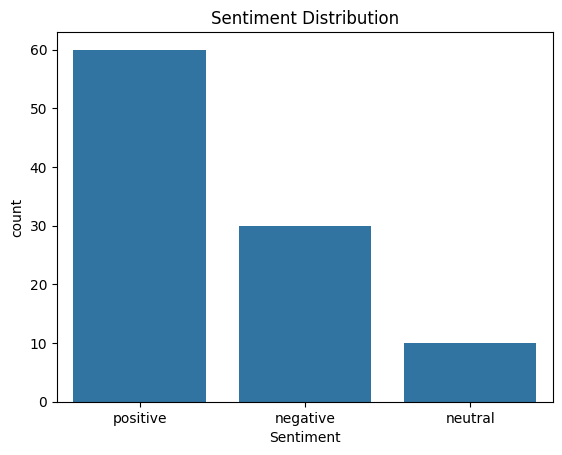

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\91944\Desktop\sentimental-analysis-prediction\100_tweets_sample.csv")
print(df.columns)


In [17]:
import pandas as pd
import re

# Load your tweet dataset
df = pd.read_csv(r"C:\Users\91944\Desktop\sentimental-analysis-prediction\100_tweets_sample.csv")

# Text cleaning function
def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'http\S+', '', text)          # remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text

# Apply cleaning function to 'Tweet' column
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Show result
print(df.head())


                                    Tweet Sentiment  \
0          AI is transforming the future!  positive   
1  Can't believe how fast AI is evolving.  positive   
2      Not a fan of the latest AI trends.  negative   
3    AI ethics should be taken seriously.   neutral   
4            Machine learning is so cool!  positive   

                          Cleaned_Tweet  
0         ai is transforming the future  
1  cant believe how fast ai is evolving  
2     not a fan of the latest ai trends  
3   ai ethics should be taken seriously  
4           machine learning is so cool  


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned tweets
X = vectorizer.fit_transform(df['Cleaned_Tweet'])

# Check the shape of the feature matrix
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (100, 39)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode the sentiment column
y = le.fit_transform(df['Sentiment'])

# Check encoded values
print("Encoded Sentiment Labels:", y[:5])


Encoded Sentiment Labels: [2 2 0 1 2]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Optional: clean the tweets if not already done
# df['Cleaned_Tweet'] = df['Tweet'].apply(lambda x: ...)

# Use TF-IDF to convert text to features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Cleaned_Tweet'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (100, 39)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         4
     neutral       1.00      1.00      1.00         4
    positive       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [23]:
import joblib

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [26]:
text_input = input("Enter a tweet: ")
cleaned_input = clean_text(text_input)
vector_input = vectorizer.transform([cleaned_input])
predicted_label = le.inverse_transform(model.predict(vector_input))
print(f"Predicted Sentiment: {predicted_label[0]}")


Predicted Sentiment: positive
